Download [austin_weather.csv](https://drive.google.com/uc?export=download&id=10JkPB2hhDmkVUoCGFP6gpoRL1mvx0OPf)



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('austin_weather.csv')
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
Date                          1319 non-null object
TempHighF                     1319 non-null int64
TempAvgF                      1319 non-null int64
TempLowF                      1319 non-null int64
DewPointHighF                 1319 non-null object
DewPointAvgF                  1319 non-null object
DewPointLowF                  1319 non-null object
HumidityHighPercent           1319 non-null object
HumidityAvgPercent            1319 non-null object
HumidityLowPercent            1319 non-null object
SeaLevelPressureHighInches    1319 non-null object
SeaLevelPressureAvgInches     1319 non-null object
SeaLevelPressureLowInches     1319 non-null object
VisibilityHighMiles           1319 non-null object
VisibilityAvgMiles            1319 non-null object
VisibilityLowMiles            1319 non-null object
WindHighMPH                   1319 non-null object
WindAvgMPH                   

<h2>Soal 1: Visualisasi Scatter Plot Perbandingan Kuantitatif</h2>

Pada tugas kali ini kita akan mengamati nilai DewPointAvg (F) dengan mengamati nilai  HumidityAvg (%), TempAvg (F), dan WindAvg (MPG)

Perhatikan bahwa data kita tidaklah siap untuk di analisis, salah satunya tipe data dari DewPointAvg (F), HumidityAvg (%), dan WindAvg (MPG) adalah object, padahalnya data nya ber isi numeric. maka :
- Ubahlah tipe data tersebut menjadi tipe data float

Kemudian: 

- Kalian tidak akan dengan mudah mengubah tipe data tersebut karena column tersebut mempunyai nilai '-' yang dimana tidak bisa di ubah ke bentuk float, maka replace lah terlebih dahulu data yang bernilai '-' dengan nilai NaN, gunakan method .replace(). baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
- Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
- Sekarang ubah tipe datanya dengan float, gunakan method .astype(), baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

Setelah ini sebagian data siap untuk di jadikan bahan analisis. maka:

Buahlah visualisasi perbandingan kuantitatif scatter plot, sehingga menghasilkan gambar seperti dibawah:

ket: 

- colormap adalah 'coolwarm'
- berikat warna terhadap setiap data poin dengan nilai dari column TempAvgF
- berikan size terhadap setiap data poin dengan nilai dari column WindAvgMPH, kalikan dengan 20 agar size terlihat lebih besar


Berikan pendapat dari insight yang bisa di dapat dari visualisasi perbandingan kuantitatif ini!!!

![alt text](https://drive.google.com/uc?id=1Pp5oIc-39mcw2vrw6xgCRM9GsvyRtPI5)

In [9]:
# code here

df = df.replace('-', np.nan)
df = df.fillna(method = 'ffill')

df = df.astype({'TempHighF':'float64', 'TempAvgF':'float64', 'TempLowF':'float64', 'DewPointHighF':'float64', 'DewPointAvgF':'float64', 
                'DewPointLowF':'float64', 'HumidityHighPercent':'float64', 'HumidityAvgPercent':'float64', 'HumidityLowPercent':'float64', 
               'SeaLevelPressureHighInches':'float64', 'SeaLevelPressureAvgInches':'float64', 'SeaLevelPressureLowInches':'float64',
               'VisibilityHighMiles':'float64', 'VisibilityAvgMiles':'float64', 'VisibilityLowMiles':'float64', 'WindHighMPH':'float64',
               'WindAvgMPH':'float64', 'WindGustMPH':'float64'})

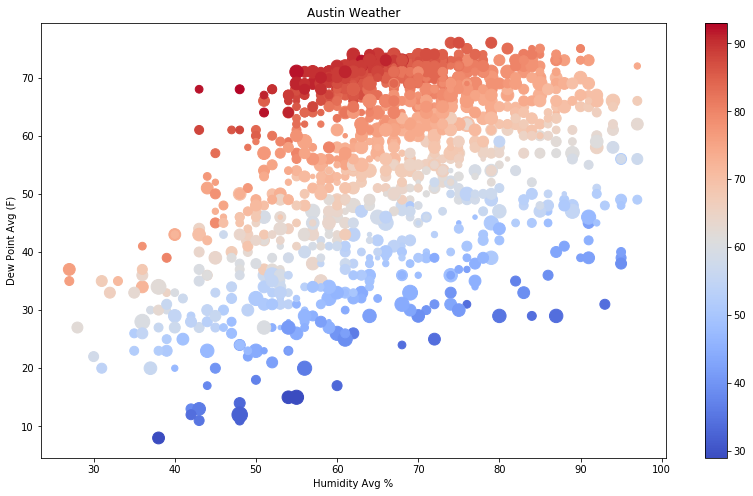

In [15]:
fig, ax = plt.subplots(figsize = (14,8))
austin = ax.scatter(df['HumidityAvgPercent'], df['DewPointAvgF'], c=df['TempAvgF'], s=df['WindAvgMPH']*20, cmap='coolwarm')

ax.set_xlabel('Humidity Avg %')
ax.set_ylabel('Dew Point Avg (F)')
fig.colorbar(austin)
ax.set_title('Austin Weather')

plt.show()

Dapat terlihat bahwa Dew Point Avg dan Humidity Avg berkorelasi positif, atau semakin tinggi % Humidity Avg akan semakin tinggi pula Dew Point Avg (F). Kemudian, dari warna yang dihasilkan pun menunjukkan tinggi rendahnya suhu atau TempAvgF. Dapat dilihat bahwa semakin tinggi DewPointAvg akan semakin tinggi TempAvgFnya. Besarnya titik dalam plot yang menggambarkan banyaknya data di suatu titik/nilai merupakan besarnya WindAvgMPH.

---

---

Downoad  <a href="https://blog.sanbercode.com/wp-content/uploads/2020/05/vgsales.csv">vgsales.csv</a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<h2>Soal 2: Preparing Data</h2>

Manipulasi data tersebut dengan menggroupkan berdasarkan Genre, kemudian ambil rata2 penjualan untuk setiap Region Kecuali Global_Sales berdasarkan kategori Genre.

In [26]:
#code here

meansales = df.groupby('Genre')["NA_Sales","EU_Sales", "JP_Sales", "Other_Sales"].mean()
meansales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.264726,0.158323,0.048236,0.056508
Adventure,0.082271,0.049868,0.040490,0.013072
Fighting,0.263667,0.119481,0.103007,0.043255
Misc,0.235906,0.124198,0.061967,0.043312
Platform,0.504571,0.227573,0.147596,0.058228
Puzzle,0.212680,0.087251,0.098471,0.021564
Racing,0.287766,0.190865,0.045388,0.061865
Role-Playing,0.219946,0.126384,0.236767,0.040060
Shooter,0.444733,0.239137,0.029221,0.078389


Expected Output:

![alt text](https://drive.google.com/uc?id=1dR4vthSt22gM_LdfSBZCMIKPL6xd7nVl)

---

<h2>Soal 3: Perbandingan Kuantitatif Barplot - Grouping Visualisasi Dengan Barplot</h2>

1. Visualisasikan gambar yang tadi kita manipulasi, untuk menghasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

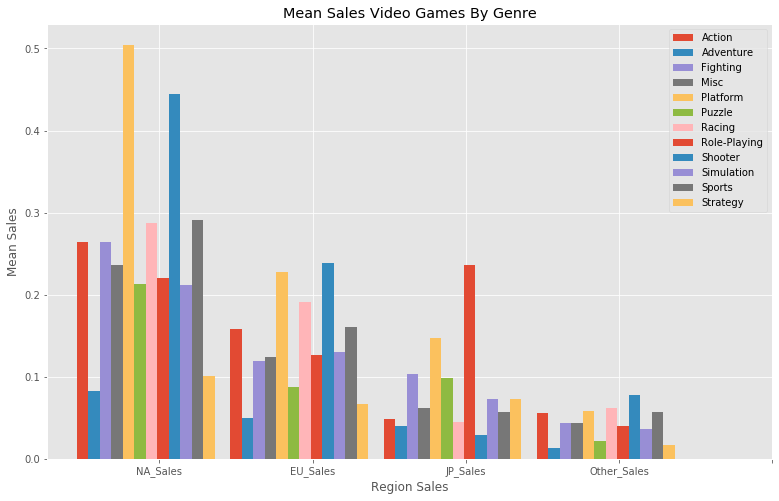

In [85]:
#code here
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(13,8))

x = np.array([1,5,9,13])

ax.bar(x, meansales.loc['Action'], width=0.3, label='Action')
ax.bar(x+0.3, meansales.loc['Adventure'], width=0.3, label='Adventure')
ax.bar(x+0.6, meansales.loc['Fighting'], width=0.3, label='Fighting')
ax.bar(x+0.9, meansales.loc['Misc'], width=0.3, label='Misc')
ax.bar(x+1.2, meansales.loc['Platform'], width=0.3, label='Platform')
ax.bar(x+1.5, meansales.loc['Puzzle'], width=0.3, label='Puzzle')
ax.bar(x+1.8, meansales.loc['Racing'], width=0.3, label='Racing')
ax.bar(x+2.1, meansales.loc['Role-Playing'], width=0.3, label='Role-Playing')
ax.bar(x+2.4, meansales.loc['Shooter'], width=0.3, label='Shooter')
ax.bar(x+2.7, meansales.loc['Simulation'], width=0.3, label='Simulation')
ax.bar(x+3.0, meansales.loc['Sports'], width=0.3, label='Sports')
ax.bar(x+3.3, meansales.loc['Strategy'], width=0.3, label='Strategy')

ax.set_xlabel('Region Sales')
ax.set_ylabel('Mean Sales')

plt.xticks(np.arange(3,20,4), list(meansales.columns))

plt.legend(loc='upper right')
plt.title('Mean Sales Video Games By Genre')
plt.show()

Jawab:

Dapat terlihat dari plot bahwa NA_Sales memiliki rata-rata penjualan yang paling tinggi daripada region lain, dengan urutan paling tinggi ke rendah adalah NA_Sales, EU_Sales, JP_Sales, kemudian Other_sales. Penjualan paling tinggi adalah game Platform di NA dan terendah adalah Simulation dan Shooter di region lainnya.

Pada NA_Sales penjualan video games terbanyak adalah genre Platform, diikuti dengan Shooter, lalu Sports.
Pada EU_Sales penjualan video games terbanyak adalah genre Shooter, diikuti dengan Platform, lalu Sports.
Pada JP_Sales, game bergenre Shooter tidak sebegitu diminatinya dibanding NA dan EU, terlihat bahwa penjualan video games terbanyak adalah genre Role-Playing, diikuti dengan Platform, lalu Fighting.
Pada Region lain, penjualan video game tidak jauh berbeda rata-rata tiap genrenya. Paling tinggi Shooter, kemudian diikuti 4 genre lain yang tidak jauh berbeda.

Expected Output:

![alt text](https://drive.google.com/uc?id=1A2s9Uy2i471VEYIZqMoVUIlZnVOUc8ha)

---

<h2>Soal 4: Perbandingan Kuantitatif Barplot - Stack Barplot</h2>

1. Visualisasikan gambar yang tadi kita manipulasi, untuk menhasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

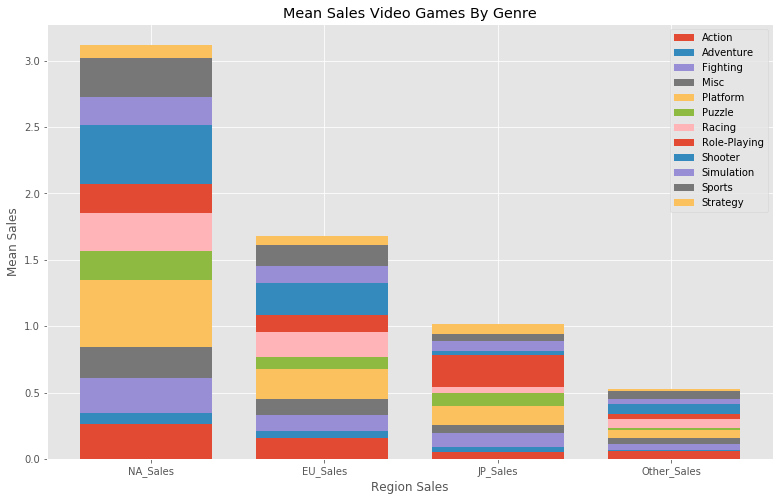

In [121]:
#code here

plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(13,8))

x = np.array([1,5,9,13])

ax.bar(x, meansales.loc['Action'], width=3, label='Action')
ax.bar(x, meansales.loc['Adventure'], width=3, label='Adventure', bottom=meansales.loc['Action'])
ax.bar(x, meansales.loc['Fighting'], width=3, label='Fighting', bottom=meansales.loc['Action']+meansales.loc['Adventure'])
ax.bar(x, meansales.loc['Misc'], width=3, label='Misc', bottom=meansales.loc['Action']+meansales.loc['Adventure']+ meansales.loc['Fighting'])
ax.bar(x, meansales.loc['Platform'], width=3, label='Platform', bottom=meansales.loc['Action']+meansales.loc['Adventure']+ meansales.loc['Fighting']+meansales.loc['Misc'])
ax.bar(x, meansales.loc['Puzzle'], width=3, label='Puzzle', bottom=meansales.loc['Action']+meansales.loc['Adventure']+ meansales.loc['Fighting']+ meansales.loc['Misc'] + meansales.loc['Platform'])
ax.bar(x, meansales.loc['Racing'], width=3, label='Racing', bottom=meansales.loc['Action']+meansales.loc['Adventure']+ meansales.loc['Fighting']+ meansales.loc['Misc'] + meansales.loc['Platform']+meansales.loc['Puzzle'])
ax.bar(x, meansales.loc['Role-Playing'], width=3, label='Role-Playing', bottom=meansales.loc['Action']+meansales.loc['Adventure']+ meansales.loc['Fighting']+ meansales.loc['Misc'] + meansales.loc['Platform']+meansales.loc['Puzzle']+meansales.loc['Racing'])
ax.bar(x, meansales.loc['Shooter'], width=3, label='Shooter', bottom=meansales.loc['Action']+meansales.loc['Adventure']+ meansales.loc['Fighting']+ meansales.loc['Misc'] + meansales.loc['Platform']+meansales.loc['Puzzle']+meansales.loc['Racing']+meansales.loc['Role-Playing'])
ax.bar(x, meansales.loc['Simulation'], width=3, label='Simulation', bottom=meansales.loc['Action']+meansales.loc['Adventure']+ meansales.loc['Fighting']+ meansales.loc['Misc'] + meansales.loc['Platform']+meansales.loc['Puzzle']+meansales.loc['Racing']+meansales.loc['Role-Playing'] +meansales.loc['Shooter'])
ax.bar(x, meansales.loc['Sports'], width=3, label='Sports', bottom=meansales.loc['Action']+meansales.loc['Adventure']+ meansales.loc['Fighting']+ meansales.loc['Misc'] + meansales.loc['Platform']+meansales.loc['Puzzle']+meansales.loc['Racing']+meansales.loc['Role-Playing'] +meansales.loc['Shooter'] +meansales.loc['Simulation'])
ax.bar(x, meansales.loc['Strategy'], width=3, label='Strategy', bottom=meansales.loc['Action']+meansales.loc['Adventure']+ meansales.loc['Fighting']+ meansales.loc['Misc'] + meansales.loc['Platform']+meansales.loc['Puzzle']+meansales.loc['Racing']+meansales.loc['Role-Playing'] +meansales.loc['Shooter'] +meansales.loc['Simulation']+meansales.loc['Sports'])

ax.set_xlabel('Region Sales')
ax.set_ylabel('Mean Sales')

plt.xticks(np.arange(1.1,13,3.95), list(meansales.columns))

plt.legend(loc='upper right')
plt.title('Mean Sales Video Games By Genre')
plt.show()

Jawab:

Expected Output:

![alt text](https://drive.google.com/uc?id=1_yis-3aZsEbsk68tpoPHoNlFftaz2GrO)

Menggunakan grafik bar ini kita menjadi lebih mudah untuk melihat urutan penjualan genre video games sesuai dengan tinggi-rendahnya rata-rata penjualan, di tiap kelompok. Dapat dilihat bahwa untuk NA_Sales, paling tinggi adalah penjualan game Platform, begitu pula dengan EU_Sales dan JP_Sales (sepertinya Other_Sales juga). Juga dapat dilihat bahwa penjualan paling rendah adalah Action.

Sayangnya dalam grafik ini hanya terdiri dari sedikit variasi warna sehingga sedikit membingungkan dalam membacanya.